# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Kaushini | Chandrachoodamani | K.C | 4 | 50% |
| Member 2: | First Name | Last Name | Signature | 4 | 50% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

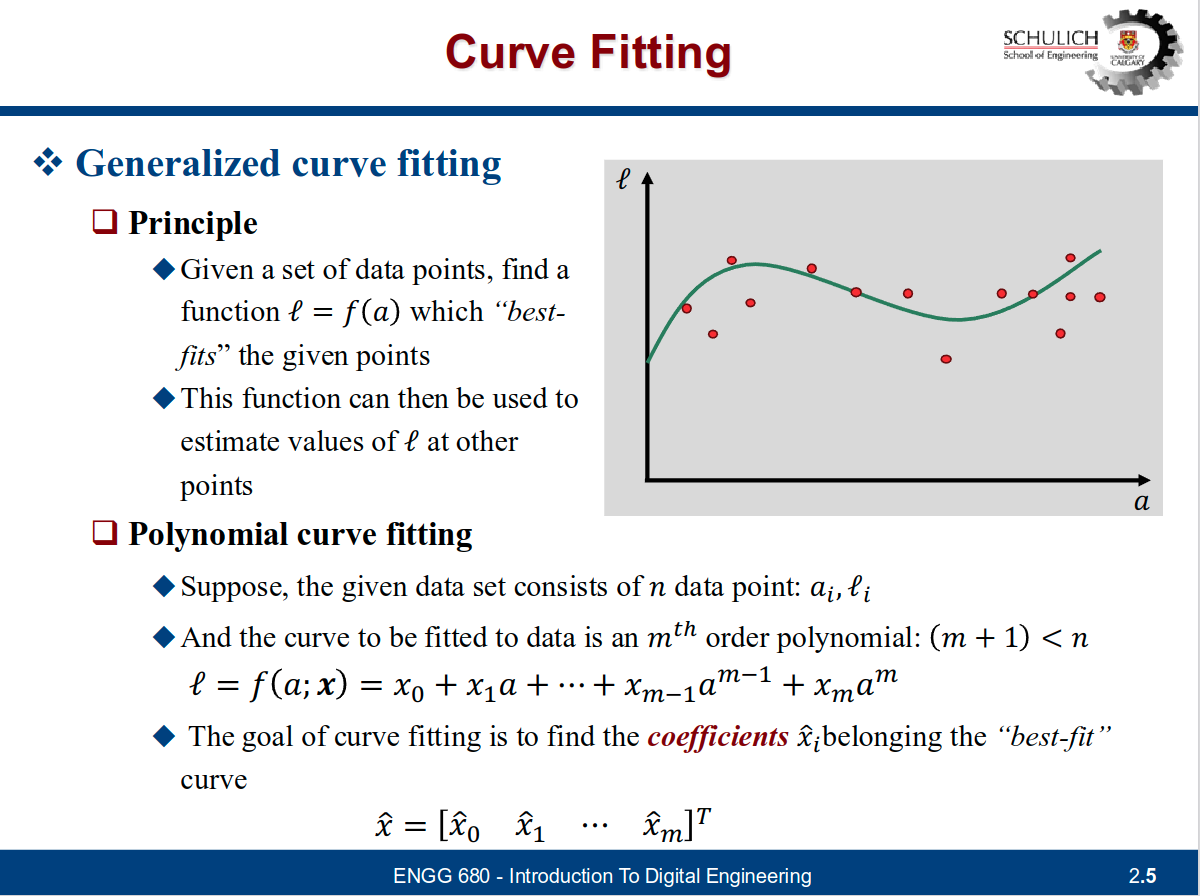

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [1]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/
%cd engg680_2024_fall/Lab_Assignment2
df_data = pd.read_excel('data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:,0]
l_var = arr_data[:,1]
l_true = arr_data[:,2]

Mounted at /content/drive
/content/drive/MyDrive
/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2


In [3]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)



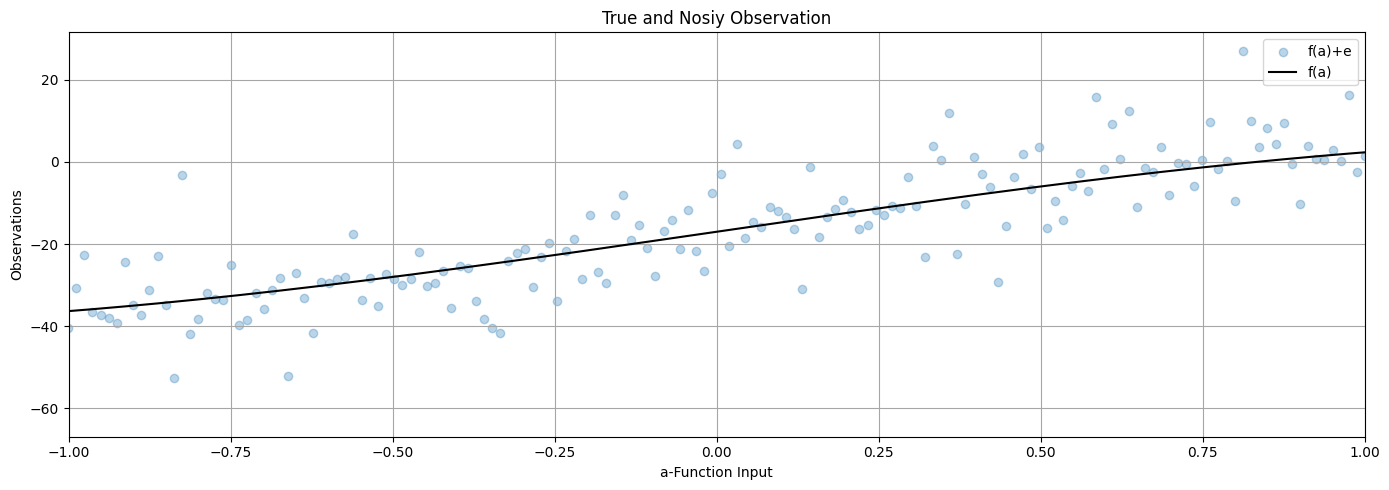

In [4]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
plt.scatter(a, l, color='tab:blue', marker='o', alpha=0.3)
plt.plot(a, l_true, color='k')
plt.title("True and Nosiy Observation")
plt.xlabel("a-Function Input")
plt.ylabel("Observations")
plt.legend(["f(a)+e","f(a)"])
plt.xlim(-1,1)


ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [5]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''
   # Step 1: Construct the (Vandermonde)matrix A for Polynomial Regression
   # Each row of A contains powers of the corresponding a values
    A = np.vander(a, N=deg+1, increasing=True)
   # Step 2: Perform the linear least square estimation using LSE formula
   # (A.T * P * A) * x = A.T * P * l, solve for x (the polynomial coefficients)

    # Compute A transpose times P (A^T * P)
    AT_P = A.T @ P

   # Compute normal equation: (AtP @ A) * x = AtP @ l
    N = AT_P @ A
    u = AT_P @ l

   # Solve for x (the polynomial coefficients) using np.linalg.solve
    x = np.linalg.solve(N, u)

   # Step 3: Calculate observation residuals (v = l - A * x)
    v = l - A @ x

   # Step 4: Compute the a posteriori variance factor (apv)
   # apv = (v.T * P * v) / (n - deg - 1), where n is the number of observations
    apv = (v.T @ P @ v) / (len(l) - deg - 1)

   # Step 5: Compute the covariance matrix of the estimated coefficients (cov_x)
    cov_x = apv * np.linalg.inv(N)

    return (x, cov_x, apv, v)

In [23]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
# Define polynomial degrees
degrees = [1, 3, 5]

# Initialize lists to store results
results = []

# Loop through each degree, call the function, and store the results
for deg in degrees:
    result = fit_polynomial_curve(a, l, P, deg)
    results.append(result)

# Separate results for degree 1, 3, and 5
results_deg1, results_deg3, results_deg5 = results

# Testing: print the polynomial coefficients, APV, and covariance matrix for each degree
for deg, res in zip(degrees, results):
    x, cov_x, apv, v = res
    print(f"Degree {deg}:")
    print(f"  Polynomial Coefficients (x): {x}")
    print(f"  Covariance Matrix (Cov_x):\n{cov_x}\n")



Degree 1:
  Polynomial Coefficients (x): [-16.59352348   7.25633807]
  Covariance Matrix (Cov_x):
[[3.25485217e-01 3.36083382e-17]
 [3.36083382e-17 9.85406897e-02]]

Degree 3:
  Polynomial Coefficients (x): [-16.72496774  19.63961372   0.03979476  -2.08281013]
  Covariance Matrix (Cov_x):
[[ 2.97597234e-01  1.25310819e-16 -5.00544889e-02 -1.70673481e-17]
 [ 1.25310819e-16  2.50276449e-01 -2.18317337e-17 -3.53602826e-02]
 [-5.00544889e-02 -2.18317337e-17  1.51540027e-02  3.15360109e-18]
 [-1.70673481e-17 -3.53602826e-02  3.15360109e-18  5.94743723e-03]]

Degree 5:
  Polynomial Coefficients (x): [-1.65770980e+01  2.28207004e+01 -1.09433276e-01 -3.58096979e+00
  1.75697706e-02  1.36073672e-01]
  Covariance Matrix (Cov_x):
[[ 4.48309229e-01  1.45919540e-15 -2.11135021e-01 -5.80697323e-16
   1.91768063e-02  4.87813161e-17]
 [ 1.45919540e-15  7.38990309e-01 -1.30554523e-15 -2.68486029e-01
   1.49626561e-16  2.12894514e-02]
 [-2.11135021e-01 -1.30554523e-15  1.78983526e-01  5.41298127e-16
  -

In [18]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

# Extract the polynomial coefficients for each degree
x_deg1, x_deg3, x_deg5 = results[0][0], results[1][0], results[2][0]

# Reverse the order of the coefficients for the format expected by np.polyval
line_uw = np.polyval(x_deg1[::-1], a)    # Degree 1 (linear)
cubic_uw = np.polyval(x_deg3[::-1], a)   # Degree 3 (cubic)
quintic_uw = np.polyval(x_deg5[::-1], a) # Degree 5 (quintic)




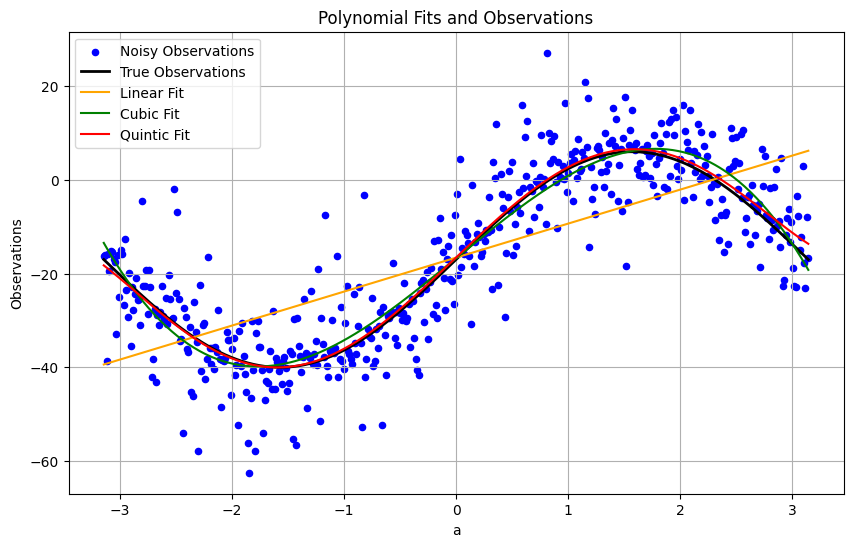

In [19]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

# Plot the noisy and true observations
plt.figure(figsize=(10, 6))
plt.scatter(a, l, label='Noisy Observations', color='blue', s=20, marker='o')
plt.plot(a, l_true, label='True Observations', color='black', linewidth=2)

# Plot Polynomial fits
plt.plot(a, line_uw, color='orange',label='Linear Fit')
plt.plot(a, cubic_uw, color='green',label='Cubic Fit')
plt.plot(a, quintic_uw, color='red',label='Quintic Fit')

# Define labels and title
plt.xlabel('a')
plt.ylabel('Observations')
plt.title('Polynomial Fits and Observations')
plt.legend()
plt.grid(True)


In [21]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
print("Posterior Variance Factor for Linear fit:", results[0][2])
print("Posterior Variance Factor for Cubic fit:", results[1][2])
print("Posterior Variance Factor for Quintic fit:", results[2][2])


Posterior Variance Factor for Linear fit: 162.742608604322
Posterior Variance Factor for Cubic fit: 66.13227783131883
Posterior Variance Factor for Quintic fit: 63.7583446301842


In [20]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
print("Norm Values between Predicted and True observations for:")
print("Linear Fit:",np.linalg.norm(line_uw - l_true))
print("Cubic Fit:",np.linalg.norm(cubic_uw - l_true))
print("Quintic Fit:",np.linalg.norm(quintic_uw - l_true))

Norm Values between Predicted and True observations for:
Linear Fit: 229.0601679674409
Cubic Fit: 38.285979929116664
Quintic Fit: 17.369967196966478


In [11]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# Lower values of norm and apv indicate a better fit and lower errors. The goodness of fit becomes better and the error becomes smaller as the degree
# of the ploynomial increases. Therefore, both metrics reflect the same overall trend, the higher degree polynomials fit the data better.


In [22]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P1 = np.diag(1/l_var)

Degree 1:
  Polynomial Coefficients (x): [-16.54496159   7.67854617]
  Covariance Matrix (Cov_x):
[[0.2391759  0.00093922]
 [0.00093922 0.07970217]]

Degree 3:
  Polynomial Coefficients (x): [-16.77797524  20.33157168  -0.03430166  -2.23356908]
  Covariance Matrix (Cov_x):
[[ 4.82927500e-02 -3.64626310e-04 -8.52860041e-03 -1.11048648e-05]
 [-3.64626310e-04  4.12770553e-02 -1.47079664e-04 -5.95126437e-03]
 [-8.52860041e-03 -1.47079664e-04  2.84554500e-03  5.63867793e-05]
 [-1.11048648e-05 -5.95126437e-03  5.63867793e-05  1.05097444e-03]]

Degree 5:
  Polynomial Coefficients (x): [-1.67951025e+01  2.26801815e+01 -7.07246017e-02 -3.49795817e+00
  8.12376456e-03  1.22547782e-01]
  Covariance Matrix (Cov_x):
[[ 6.95934072e-02 -6.42905748e-03 -3.75805296e-02  2.89968394e-03
   3.64303084e-03 -2.51408885e-04]
 [-6.42905748e-03  8.67927460e-02  4.98845497e-03 -3.32194024e-02
  -5.26606891e-04  2.73767204e-03]
 [-3.75805296e-02  4.98845497e-03  3.37493657e-02 -2.30339140e-03
  -3.74751719e-03  

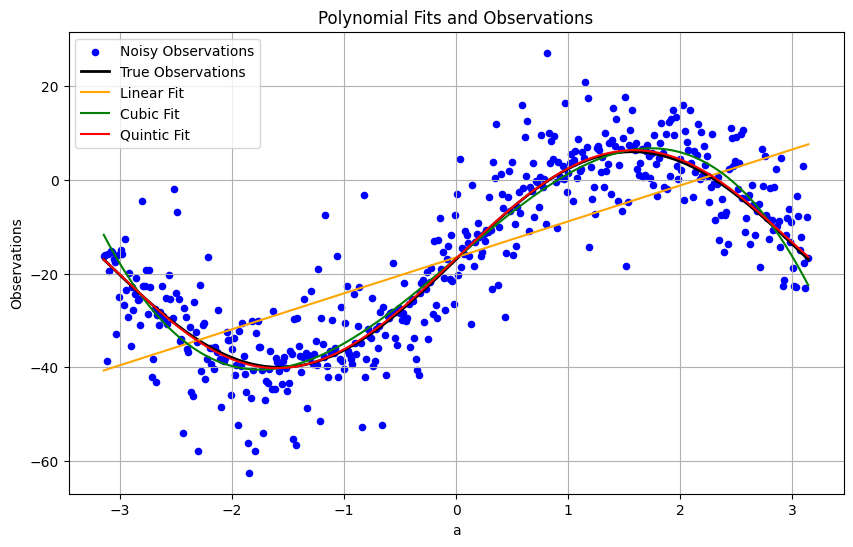

In [26]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

# Step 6
# Define polynomial degrees
degrees = [1, 3, 5]

# Initialize lists to store results
results = []

# Loop through each degree, call the function, and store the results
for deg in degrees:
    result = fit_polynomial_curve(a, l, P1, deg)
    results.append(result)

# Separate results for degree 1, 3, and 5
results_deg1, results_deg3, results_deg5 = results

# Testing: print the polynomial coefficients, APV, and covariance matrix for each degree
for deg, res in zip(degrees, results):
    x, cov_x, apv, v = res
    print(f"Degree {deg}:")
    print(f"  Polynomial Coefficients (x): {x}")
    print(f"  Covariance Matrix (Cov_x):\n{cov_x}\n")

# Step 7
# Extract the polynomial coefficients for each degree
x_deg1, x_deg3, x_deg5 = results[0][0], results[1][0], results[2][0]

# Reverse the order of the coefficients for the format expected by np.polyval
line_uw = np.polyval(x_deg1[::-1], a)    # Degree 1 (linear)
cubic_uw = np.polyval(x_deg3[::-1], a)   # Degree 3 (cubic)
quintic_uw = np.polyval(x_deg5[::-1], a) # Degree 5 (quintic)

# Step 8
# Plot the noisy and true observations
plt.figure(figsize=(10, 6))
plt.scatter(a, l, label='Noisy Observations', color='blue', s=20, marker='o')
plt.plot(a, l_true, label='True Observations', color='black', linewidth=2)

# Plot Polynomial fits
plt.plot(a, line_uw, color='orange',label='Linear Fit')
plt.plot(a, cubic_uw, color='green',label='Cubic Fit')
plt.plot(a, quintic_uw, color='red',label='Quintic Fit')

# Define labels and title
plt.xlabel('a')
plt.ylabel('Observations')
plt.title('Polynomial Fits and Observations')
plt.legend()
plt.grid(True)

# Step 9
print("Posterior Variance Factor for Linear fit:", results[0][2])
print("Posterior Variance Factor for Cubic fit:", results[1][2])
print("Posterior Variance Factor for Quintic fit:", results[2][2])

# Step 10
print("\nNorm Values between Predicted and True observations for:")
print("Linear Fit:",np.linalg.norm(line_uw - l_true))
print("Cubic Fit:",np.linalg.norm(cubic_uw - l_true))
print("Quintic Fit:",np.linalg.norm(quintic_uw - l_true))

In [14]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# The weighted LSE will generally have a lower apv than unweighted LSE, indicating a better fit, especially when there are significant
# differences in the reliability of the observations.
# The weighted LSE will generally show a lower norm than the unweighted LSE, indicating a smaller overall error, especially when some
# observations are noisy or unreliable.
# Weighted LSE minimizes noisy data influence, leading to more reliable estimates and better fit,
# emphasizing the need to account for measurement uncertainty in regression analysis.


# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

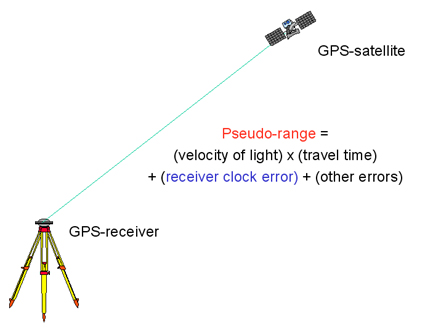

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [15]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = #...
df_sat_pos = #...

pseudorange = #...
sat_pos = #...

SyntaxError: invalid syntax (<ipython-input-15-fff4902ff8d0>, line 5)

In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = #...
m = #...

In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = #...

In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = #...

In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = #...
i = #...
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  #...
  return distance


In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  #...
  return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)


while (#convergence criteria):

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = #...

       # compute the design matrix A
       # (1 marks)
       A = #...

       # compute the misclosure array w
       # (1 marks)
       w = #...

       # compute the corrections delta
       # (1 marks)
       delta = #...

       # update the states
       # (1 marks)
       x_hat = #...


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = #...


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w #...
       arr_delta #...
       arr_err_pos #...
       arr_i #...




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = #...

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = #...




In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)



In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
